In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath("../CONSTANTS.py")))

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as colormap
import pandas as pd
import numpy as np
import seaborn as sns
from utils.confusion_matrix import CM
from utils.cm_generator import CMGenerator
from metrics.tau import Tau
from metrics.tau_weighted import TauW
%matplotlib inline

## Experiment I

Suppose there are `5000` instances of *majority* class and `100` instances of *minority* class. Let's generate a uniformly selected subset of all possible Confusion Matrices (CM), and let `Tau` to define the corresponding points to each of those confusion matrices.

let's look at some of these auto-generated CM's.

In [2]:
space_w = 30
# gen = CMGenerator(n_p=100, n_n=5000, n_cm=space_w)
gen = CMGenerator(n_p=2500, n_n=2500, n_cm=space_w)
gen.generate_cms()

In [3]:
all_tauw = []
for cm in gen.all_cms:
    tauw = TauW(cm, weights = np.array([1.0, 1.0, 1]))
    all_tauw.append(tauw.value)

tauw_mat = np.flip(np.array(all_tauw).reshape((space_w, space_w)), 0)

Text(0, 0.5, 'TP -- FN')

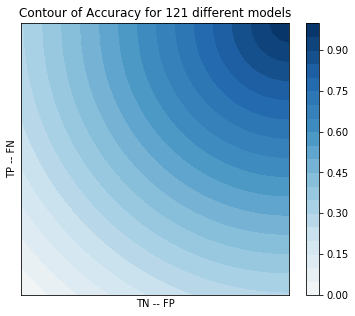

In [4]:
fig, ax = plt.subplots(figsize=(6,5))

x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)

X, Y = np.meshgrid(x, y)
cp = plt.contourf(X, Y, np.flipud(tauw_mat), 20, cmap='RdBu',  vmin = -1, vmax=1)  # RdGy, bone, viridis, RdBu
# plt.contour(X, Y, np.flipud(hss_mat), 50, cmap='viridis')
plt.colorbar()
# plt.clabel(cp, fontsize=6, colors='w', inline=False)
plt.xticks([])
plt.yticks([])
plt.title('Contour of Accuracy for 121 different models')
plt.xlabel('TN -- FP')
plt.ylabel('TP -- FN')
# plt.show()
# plt.savefig('../../plots/imbalanced/Tau_heatmap_accuracy_2500_2500.svg')

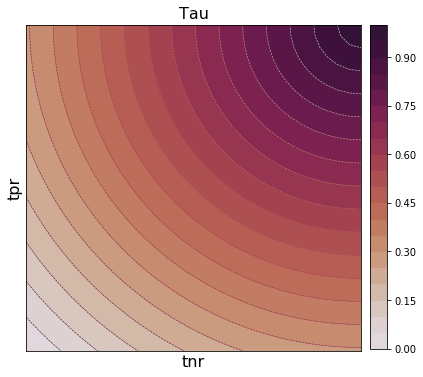

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)

X, Y = np.meshgrid(x, y)
cp = ax.contourf(X, Y, np.flipud(tauw_mat), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
cp2 = ax.contour(X, Y, np.flipud(tauw_mat), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')

# color bar
cb_ax = fig.add_axes([0.92, 0.13, 0.04, 0.75])  # [left, bottom, width, height]
fig.colorbar(cp, cax=cb_ax, orientation='vertical')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Tau', fontsize=16)
ax.set_xlabel('tnr', fontsize=16)
ax.set_ylabel('tpr', fontsize=16)

# plt.show()
# plt.savefig('../../plots/imbalanced/Tau_heatmap_a_1_b_1_c_1.svg')
plt.savefig('../../plots/customized/Tau_a_[1]_b_[1]_c_[1].png', dpi=300, transparent=True, bbox_inches='tight')

## Changing the variable `b`

In [6]:
a_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
b_w = [1, 5, 10, 15, 20, 25, 30, 35, 40]
c_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
all_surfaces = []
for a, b, c in zip(a_w, b_w, c_w):
    all_values = []
    for cm in gen.all_cms:
        tauw = TauW(cm, weights = np.array([a, b, c]))
        all_values.append(tauw.value)

    surface = np.flip(np.array(all_values).reshape((space_w, space_w)), 0)
    all_surfaces.append(surface)

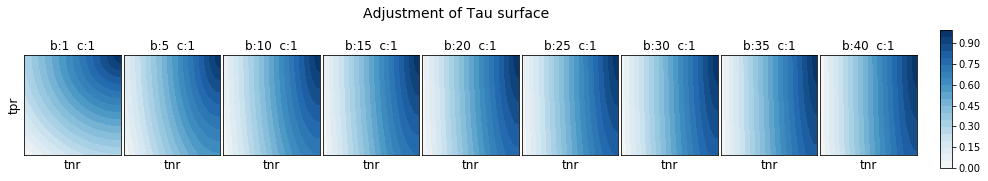

In [7]:
all_titles = ['b:{}  c:{}'.format(b, c) for b, c in zip(b_w, c_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), levels= 20, cmap='RdBu', vmin = -1, vmax=1)  # [RdBu, RdGy, bone, viridis, cividis, plasma, RdYlGn, Spectral], 
#     ax.clabel(cp, fontsize=6, colors='w', inline=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    
# Setting color bar
cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)  # use `top` to adjust the suptitle.
# plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]))

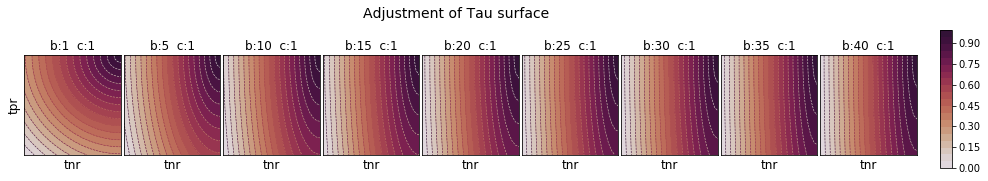

In [8]:
all_titles = ['b:{}  c:{}'.format(b, c) for b, c in zip(b_w, c_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
    cp2 = ax.contour(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    
# Setting color bar
cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)  # use `top` to adjust the suptitle.
# plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]))
plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].png'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]),
           dpi=300, transparent=True, bbox_inches='tight')

## A 3D Look

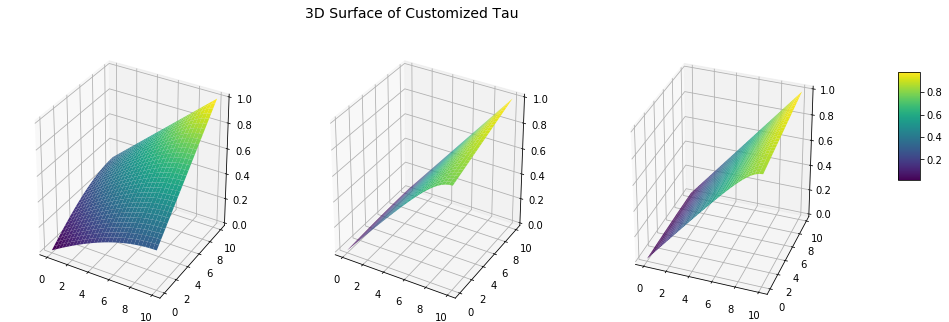

In [9]:
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='viridis', edgecolor ='none') 

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='viridis', edgecolor ='none') 

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='viridis', edgecolor ='none') 


cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)

ax.view_init(elev=30, azim=290)
# fig.tight_layout(h_pad=2.0, w_pad=0.2)
# plt.show();

plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]))

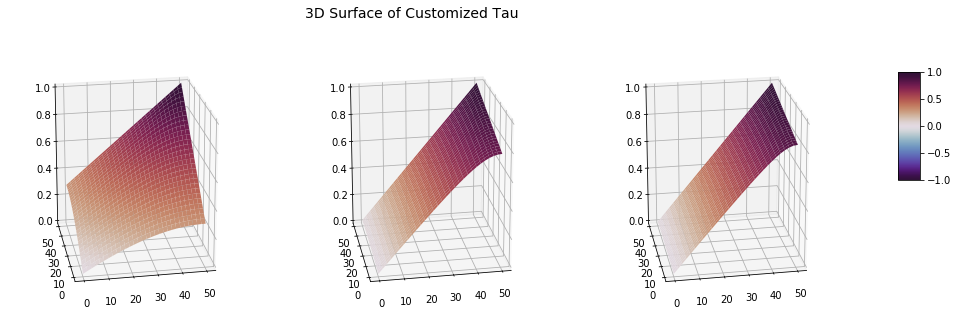

In [10]:
x = np.linspace(0, 50, space_w)
y = np.linspace(0, 50, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1)
ax.view_init(elev=20, azim=260)

cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)


# fig.tight_layout(h_pad=2.0, w_pad=0.2)
# plt.show();

plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]))
plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].png'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]), 
           dpi=300, transparent=True, bbox_inches='tight')

## Changing the variable `a`

In [11]:
a_w = [1, 5, 10, 15, 20, 25, 30, 35, 40]
b_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
c_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
all_surfaces = []
for a, b, c in zip(a_w, b_w, c_w):
    all_values = []
    for cm in gen.all_cms:
        tauw = TauW(cm, weights = np.array([a, b, c]))
        all_values.append(tauw.value)

    surface = np.flip(np.array(all_values).reshape((space_w, space_w)), 0)
    all_surfaces.append(surface)

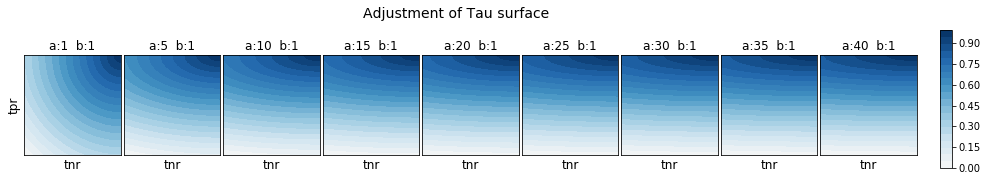

In [12]:
all_titles = ['a:{}  b:{}'.format(a, b) for a, b in zip(a_w, b_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), levels= 20, cmap='RdBu', vmin = -1, vmax=1)  # [RdBu, RdGy, bone, viridis, cividis, plasma, RdYlGn, Spectral], 
#     ax.clabel(cp, fontsize=6, colors='w', inline=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    
# Setting color bar
cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)  # use `top` to adjust the suptitle.
# plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]))

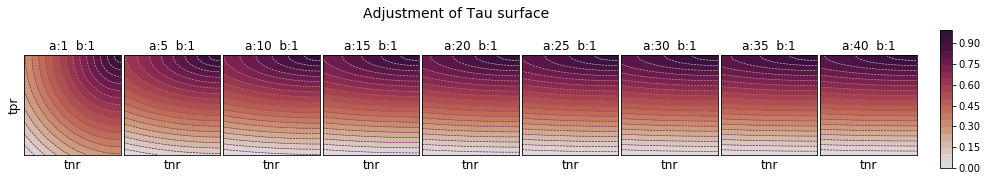

In [13]:
all_titles = ['a:{}  b:{}'.format(a, b) for a, b in zip(a_w, b_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
    cp2 = ax.contour(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    
# Setting color bar
cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)  # use `top` to adjust the suptitle.
# plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]))
plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].png'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]),
           dpi=300, transparent=True, bbox_inches='tight')

## A 3D Look

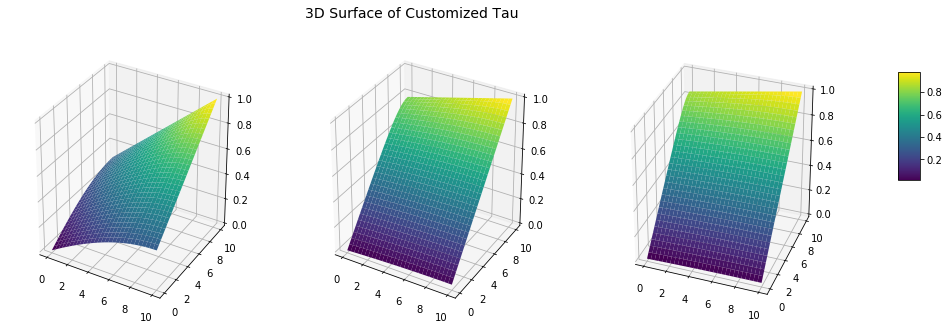

<Figure size 432x288 with 0 Axes>

In [14]:
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='viridis', edgecolor ='none') 

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='viridis', edgecolor ='none') 

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='viridis', edgecolor ='none') 


cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)

ax.view_init(elev=30, azim=290)
# fig.tight_layout(h_pad=2.0, w_pad=0.2)
plt.show();

plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]))

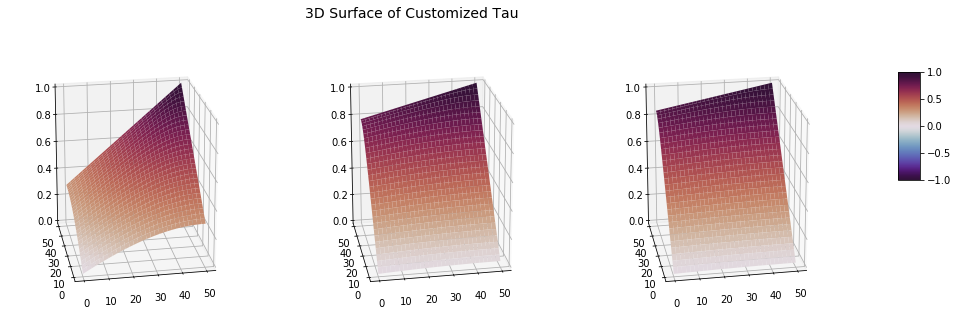

In [15]:
x = np.linspace(0, 50, space_w)
y = np.linspace(0, 50, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1)
ax.view_init(elev=20, azim=260)

cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)


# fig.tight_layout(h_pad=2.0, w_pad=0.2)
# plt.show();

plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]))
plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].png'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]), 
           dpi=300, transparent=True, bbox_inches='tight')

## Changing the variable `b` and `c`

In [16]:
a_w = [1, 1, 1, 1, 1, 1, 1, 1, 1]
b_w = [1, 5, 10, 15, 20, 25, 30, 35, 40]
c_w = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
all_surfaces = []
for a, b, c in zip(a_w, b_w, c_w):
    all_values = []
    for cm in gen.all_cms:
        tauw = TauW(cm, weights = np.array([a, b, c]))
        all_values.append(tauw.value)

    surface = np.flip(np.array(all_values).reshape((space_w, space_w)), 0)
    all_surfaces.append(surface)

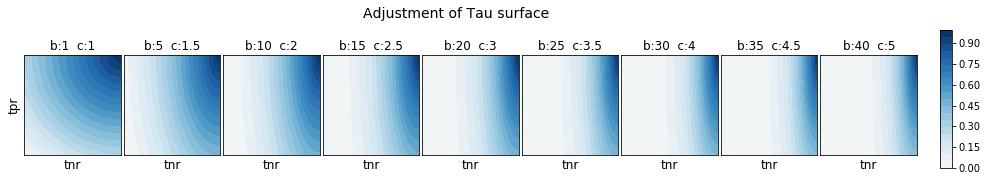

In [17]:
all_titles = ['b:{}  c:{}'.format(b, c) for b, c in zip(b_w, c_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), levels= 20, cmap='RdBu', vmin = -1, vmax=1)  # [RdBu, RdGy, bone, viridis, cividis, plasma, RdYlGn, Spectral], 
#     ax.clabel(cp, fontsize=6, colors='w', inline=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    
# Setting color bar
cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)  # use `top` to adjust the suptitle.
# plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]))

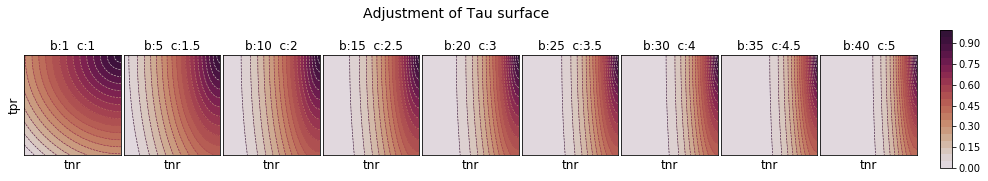

In [18]:
all_titles = ['b:{}  c:{}'.format(b, c) for b, c in zip(b_w, c_w)]
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)
    
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(16, 2.4))
fig.suptitle('Adjustment of Tau surface', fontsize=14)
for idx, ax in enumerate(axs.flat):
    cp = ax.contourf(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight_shifted', vmin = -1, vmax=1)
    cp2 = ax.contour(X, Y, np.flipud(all_surfaces[idx]), 20, cmap='twilight', vmin = -1, vmax=1, linewidths=.6, linestyles='dashed')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(all_titles[idx])

for ax in axs.flat:
    ax.set_xlabel('tnr', fontsize=12)
    ax.set_ylabel('tpr', fontsize=12)
    
# Setting color bar
cb_ax = fig.add_axes([0.92, 0.05, 0.01, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(cp, cax=cb_ax, orientation='vertical')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.subplots_adjust(wspace=0.03, hspace=0.3, top=0.7)  # use `top` to adjust the suptitle.
plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]))
plt.savefig('../../plots/customized/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].png'.format(a_w[0], a_w[-1], b_w[0], b_w[-1], c_w[0], c_w[-1]),
           dpi=300, transparent=True, bbox_inches='tight')

## A 3D Look

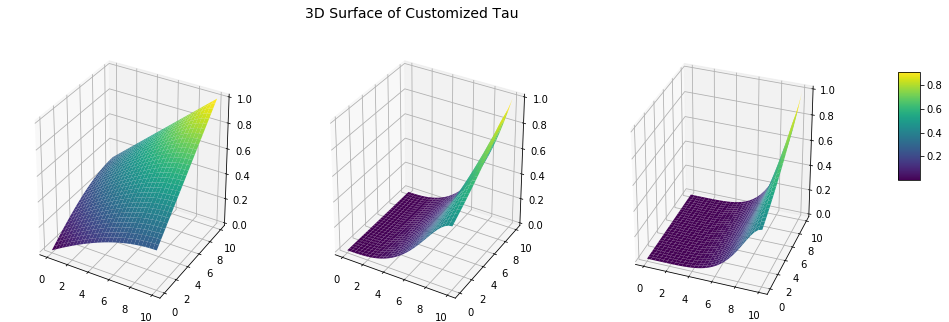

In [19]:
x = np.linspace(0, 10, space_w)
y = np.linspace(0, 10, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='viridis', edgecolor ='none') 

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='viridis', edgecolor ='none') 

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='viridis', edgecolor ='none') 

cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)

ax.view_init(elev=30, azim=290)
# fig.tight_layout(h_pad=2.0, w_pad=0.2)
plt.show();

# plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]))

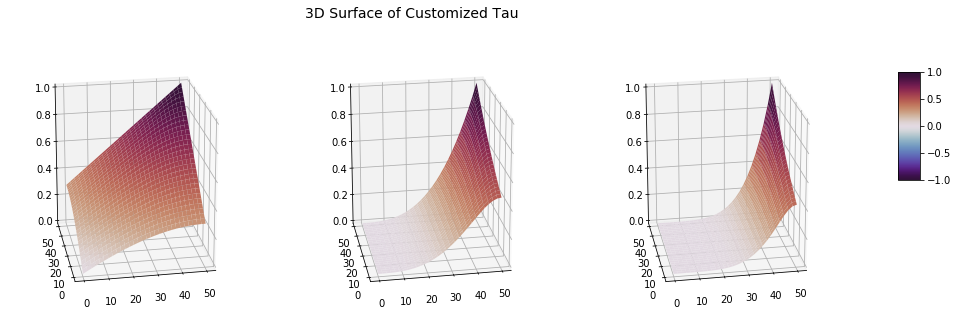

In [20]:
x = np.linspace(0, 50, space_w)
y = np.linspace(0, 50, space_w)
X, Y = np.meshgrid(x, y)

i, j, k = 0, 4, 8
fig = plt.figure(figsize=(15, 5))
fig.suptitle('3D Surface of Customized Tau', fontsize=14)
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[i]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 2, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[j]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1) 
ax.view_init(elev=20, azim=260)

ax = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax.plot_surface(X, Y, np.flipud(all_surfaces[k]), cmap='twilight_shifted', edgecolor ='none', vmin = -1, vmax=1, alpha=1)
ax.view_init(elev=20, azim=260)

cb_ax = fig.add_axes([0.95, 0.5, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(surf, cax=cb_ax, shrink = 0.5, aspect = 5)


# fig.tight_layout(h_pad=2.0, w_pad=0.2)
# plt.show();

plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].svg'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]))
plt.savefig('../../plots/3d/tau_a_[{}_{}]_b_[{}_{}]_C_[{}_{}].png'.format(a_w[i], a_w[j], b_w[i], b_w[j], c_w[i], c_w[j]), 
           dpi=300, transparent=True, bbox_inches='tight')